# Introduction à la cartographie avec Python

Lino Galiana  
2025-10-06

<div class="badge-container"><div class="badge-text">Pour essayer les exemples présents dans ce tutoriel :</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/visualisation/maps.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«maps»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«visualisation%20maps%20correction»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«maps»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«visualisation%20maps%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//blob/main//notebooks/visualisation/maps.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

> **Compétences à l’issue de ce chapitre**
>
> -   Comprendre les enjeux de la cartographie appliquée à la visualisation des données spatiales ;
> -   Utiliser Python pour créer des cartes, en mobilisant les principes de base de la représentation géographique ;
> -   Explorer les exercices proposés pour appréhender les techniques cartographiques en pratique ;
> -   Appliquer les outils et méthodes vus dans la partie sur données spatiales pour produire des visualisations cartographiques efficaces ;
> -   Maîtriser la progression pédagogique visant à traduire l’information spatiale en carte informative.

# 1. Introduction

La cartographie est l’une des plus anciennes représentations d’informations sous forme graphique. Longtemps cantonnée aux domaines militaires et administratifs ou à la synthèse d’informations pour la navigation, la cartographie est, au moins depuis le XIXe siècle, une des formes privilégiées de représentation de l’information. Il s’agit de l’époque où la carte par aplat de couleur, dite carte choroplèthe, a commencé à devenir une représentation de données géographiques traditionnelle.

D’après Chen et al. (2008), la première représentation de ce type a été proposée par Charles Dupin en 1826 <a href="#fig-dupin" class="quarto-xref">Figure 1.1</a> pour représenter les niveaux d’instruction sur le territoire français. L’émergence des cartes choroplèthes est en effet indissociable de l’organisation du pouvoir sous forme d’entités politiques supposées unitaires. Par exemple, les cartes du monde représentent souvent des aplats de couleurs à partir des nations, les cartes nationales à partir d’échelons administratifs (régions, départements, communes, mais aussi États ou *Länder*).

<figure id="fig-dupin">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Carte_figurative_de_l%27instruction_populaire_de_la_France.jpg/800px-Carte_figurative_de_l%27instruction_populaire_de_la_France.jpg" />
<figcaption>Figure 1.1: La première carte choroplèthe par Dupin (1826)</figcaption>
</figure>

On peut voir l’émergence pendant le XIXe siècle de la carte choroplèthe comme un moment important de la cartographie, un glissement de l’usage militaire vers l’usage politique. Il ne s’agissait plus exclusivement de représenter le territoire physique mais aussi la réalité socioéconomique, dans des bornes administratives connues de tous.

Avec la prolifération de données géolocalisées et l’usage accru de données pour la décision, il est devenu crucial pour les *data scientists* de savoir faire une carte rapidement. Ce chapitre, complément de celui sur les [données spatiales](../../content/manipulation/03_geopandas_intro.qmd), propose quelques exercices pour apprendre les enjeux de la représentation de données sous forme cartographique avec `Python`.

> **Note**
>
> Produire de belles cartes demande du temps mais aussi du bon sens. Comme toute représentation graphique, il est important de réfléchir au message à faire passer et aux moyens appropriés.  
> La sémiologie cartographique, une discipline scientifique qui s’intéresse aux messages transmis par les cartes, propose certaines règles pour éviter de transmettre des messages faussés, volontairement ou involontairement.
>
> Certaines peuvent être retrouvées à travers des conseils pratiques dans ce [guide de sémiologie cartographique](https://www.insee.fr/fr/statistiques/3640429) de l’Insee. Celles-ci sont reprises dans [ce guide](https://juliedjidji.github.io/memocarto/semio.html).
>
> [Cette présentation](https://neocarto.github.io/docs/slides/ENTPE/docs/#/title-slide) de Nicolas Lambert revient, à partir de nombreux exemples, sur quelques principes de la *dataviz* cartographique.

Ce chapitre présentera d’abord quelques fonctionnalités basiques de [`Geopandas`](https://geopandas.org/mapping.html) pour la construction de cartes figées. Pour contextualiser l’information présentée, nous utiliserons des contours officiels produits par l’IGN. Nous proposerons ensuite des cartes avec une contextualisation accrue et plusieurs niveaux d’information, ce qui permettra d’illustrer l’intérêt de l’utilisation de librairies réactives, s’appuyant sur `JavaScript`, comme [`Folium`](https://python-visualization.github.io/folium/latest/).

## 1.1 Données utilisées

Au cours de ce chapitre, nous allons utiliser plusieurs jeux de données pour illustrer différents types de cartes :

-   Des comptages de population ;
-   Les limites départementales de la France métropolitaine ;
-   Les limites communales du Finistère ;
-   Le couvert forestier du département des Landes ;
-   La localisation des stations Vélib’ ;

## 1.2 Installations préalables

Avant de pouvoir commencer, il est nécessaire d’installer quelques packages au préalable :

In [ ]:
# Sur colab
!pip install pandas fiona shapely pyproj rtree geopandas

Nous allons principalement avoir besoin de `Pandas` et `GeoPandas` pour ce chapitre.

In [ ]:
import pandas as pd
import geopandas as gpd

# 2. Premières cartes pour connaître l’emprise spatiale de ses données

Nous allons utiliser `cartiflette` qui facilite la récupération des fonds de carte administratifs de l’IGN. Ce package est un projet interministériel visant à offrir une interface simple par le biais de `Python` pour récupérer des découpages officiels de l’IGN.

En premier lieu, nous allons récupérer les limites des départements :

In [ ]:
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

Ces données rapprochent les DROM de la France hexagonale comme c’est expliqué dans l’un des [tutoriels de `cartiflette`](https://github.com/inseeFrLab/cartiflette-website/) et comme l’exercice 1 permettra de le vérifier.

L’exercice 1 vise à s’assurer que nous avons bien récupéré les contours voulus en les représentant simplement. Ceci devrait être le premier réflexe de tout *geodata scientist*.

> **Exercice 1: représentation des contours avec les méthodes de `GeoPandas`**
>
> 1.  Utiliser la méthode `plot` sur le jeu de données `departements` pour vérifier l’emprise spatiale. Les coordonnées affichées vous évoquent quelle projection ? Vérifier avec la méthode `crs`.  
> 2.  Reprojeter les données en Lambert 93 (EPSG: 2154) et faire la même carte.  
> 3.  En utilisant les options `matplotlib` adéquates, représenter une carte avec les contours noirs, le fond blanc et sans axes.  
> 4.  Faire la même carte pour les communes du Finistère.  

La carte des départements, sans modifier aucune option, ressemble à celle-ci :

Les coordonnées affichées nous suggèrent du `WGS84`, ce qu’on peut vérifier avec la méthode `crs` :

Si on fait la conversion en Lambert 93 (système légal pour l’hexagone), on obtient une emprise différente mais qui est censée être plus véridique pour la métropole (mais pas pour les DROM rapprochés puisque, par exemple, la Guyane est en principe beaucoup plus grande).

Et bien sûr, on retrouve facilement les cartes ratées du [chapitre sur `GeoPandas`](../../content/manipulation/03_geopandas_intro.qmd), par exemple si on applique une transformation prévue pour l’Amérique du Nord :

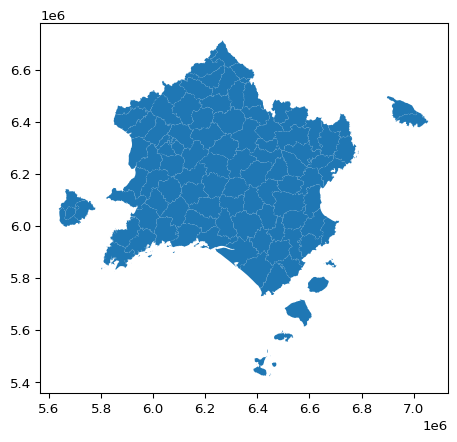

In [ ]:
departements.to_crs(5070).plot()

Si on fait une carte un petit peu plus esthétique, cela nous donne :

Et la même pour le Finistère :

Ces cartes sont simples et pourtant elles font déjà appel à des connaissances implicites. Elles demandent déjà une connaissance du territoire. Quand nous commencerons à coloriser certains départements, savoir lesquels ont des valeurs extrêmes implique de bien connaître sa géographie française. De même, cela apparaît certes évident, mais rien ne dit dans notre carte du Finistère que ce département est bordé par l’océan. Un lecteur français le verra comme une évidence, mais ce n’est pas forcément le cas d’un lecteur étranger qui, bien sûr, ne connaît pas le détail de notre géographie.

Pour cela, nous avons des parades grâce aux cartes réactives qui permettent :

-   D’afficher des informations contextuelles quand on passe la souris ou clique sur un élément de la carte.
-   D’afficher un fond de carte offrant des informations contextuelles comme les axes de transport, les localités ou les frontières naturelles.

Pour ceci, nous allons garder uniquement les données correspondant à une réelle emprise spatiale, ce qui exclut notre zoom de l’Île-de-France et les DROM.

In [ ]:
departements_no_duplicates = (
  departements
  .drop_duplicates(subset = "INSEE_DEP")
)
departements_hexagone = (
  departements_no_duplicates
  .loc[~departements['INSEE_DEP'].str.startswith("97")]
)

On obtient bien l’hexagone :

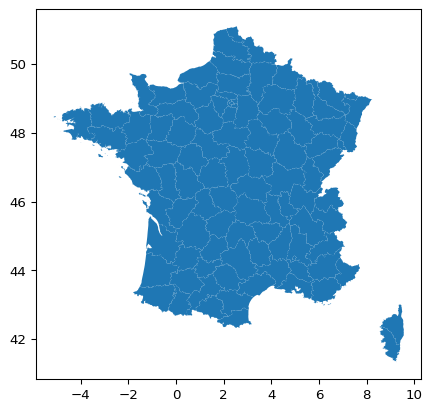

In [ ]:
departements_hexagone.plot()

Pour le prochain exercice, nous allons avoir besoin de quelques variables supplémentaires. En premier lieu, le centre géométrique de la France, qui nous permettra de placer le centre de notre carte.

In [ ]:
minx, miny, maxx, maxy = departements_hexagone.total_bounds
center = [(miny + maxy) / 2, (minx + maxx) / 2]

Nous allons aussi avoir besoin d’un dictionnaire pour renseigner à `Folium` des informations sur les paramètres de notre carte.

In [ ]:
style_function = lambda x: {
    'fillColor': 'white',
    'color': 'black',     
    'weight': 1.5,        
    'fillOpacity': 0.0   
}

`style_function` est une fonction anonyme qui sera utilisée dans l’exercice.

Une information qui s’affiche lorsqu’on passe la souris s’appelle un *tooltip* en langage de développement web.

In [ ]:
import folium
tooltip = folium.GeoJsonTooltip(
    fields=['LIBELLE_DEPARTEMENT', 'INSEE_DEP', 'POPULATION'],
    aliases=['Département:', 'Numéro:', 'Population:'],
    localize=True
)

Pour le prochain exercice, il faudra utiliser le *GeoDataFrame* dans la projection Mercator. En effet, `Folium` attend des données dans cette projection car cette librairie se base sur les fonds de carte de navigation, qui sont adaptés à cette représentation. En principe, on utilise plutôt `Folium` pour des représentations locales, où la déformation des surfaces induite par la projection Mercator n’est pas problématique.

Pour le prochain exercice, où nous représenterons la France dans son ensemble, nous faisons donc un usage quelque peu détourné de la librairie. Mais la France étant encore assez lointaine du pôle Nord, la déformation reste un prix à payer faible par rapport aux gains de l’interactivité.

> **Exercice 2: faire une première carte réactive avec `Folium`**
>
> 1.  Créer la couche de fond en utilisant l’objet `center` et le niveau `zoom_start` égal à 5.  
> 2.  Mettre à jour celle-ci en utilisant notre `departements_hexagone` et les paramètres `style_function` et `tooltip`.

Voici la couche de fond de la question 1:

Et une fois mise en forme, cela nous donne la carte:

Lorsqu’on passe sa souris sur la carte ci-dessus, on obtient quelques informations contextuelles. On peut donc jouer sur différents niveaux d’information : un premier coup d’œil permet de se représenter les données dans l’espace, une recherche approfondie permet d’avoir des informations secondaires, utiles à la compréhension, mais pas indispensables.

Ces premiers exercices illustraient une situation où on ne désire représenter que les limites des polygones. C’est une carte utile pour rapidement placer son jeu de données dans l’espace, mais cela n’apporte pas d’information supplémentaire. Pour cela, il va être nécessaire d’utiliser les données tabulaires associées à la dimension spatiale.

# 3. Représenter des données : un premier exemple avec une carte de couverture forestière

Pour cette partie, nous allons faire une carte du couvert forestier landais à partir de la BD Forêt produite par l’IGN. L’objectif n’est plus seulement de placer des limites du territoire d’intérêt mais de représenter de l’information sur celui-ci à partir des données présentes dans un *GeoDataFrame*.

La BD Forêt étant un peu volumineuse dans le format *shapefile*, nous proposons de la récupérer dans un format plus compressé : le *geopackage*.

In [ ]:
foret = gpd.read_file(
  "https://minio.lab.sspcloud.fr/projet-formation/diffusion/r-geographie/landes.gpkg"
)

Nous allons aussi créer un masque pour les contours du département:

In [ ]:
landes = (
  departements
  .loc[departements["INSEE_DEP"] == "40"].to_crs(2154)
)

> **Exercice 3: première carte par aplat de couleur**
>
> Créer une carte du couvert forestier des Landes à partir des données importées précédemment depuis la BD Forêt. Vous pouvez ajouter les limites du département pour contextualiser cette carte.
>
> Cette carte peut être créée via `Geopandas` et `matplotlib` ou via `plotnine` (cf. [chapitre précédent](../../content/visualisation/matplotlib.qmd)).

Comme on peut le voir sur la carte (<a href="#fig-landes" class="quarto-xref">Figure 3.1</a>), le département des Landes est très forestier. Ceci est logique puisque les deux tiers du département sont couverts, ce qu’on peut vérifier avec le calcul suivant[1] :

[1] This calculation is possible because both datasets are in the Lambert 93 projection, which allows for geometric operations (including surface area calculations).

In [ ]:
f"Part du couvert forestier dans les Landes: {float(foret.area.sum()/landes.area):.0%}"

/tmp/ipykernel_7465/849176039.py:1: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead


'Part du couvert forestier dans les Landes: 65%'

Ici, la carte est assez claire et donne un message relativement lisible. Bien sûr, on ne dispose pas de détails qui pourraient intéresser les curieux (par exemple, quelles localités sont particulièrement couvertes), mais on dispose d’une vision synthétique du phénomène étudié.

# 4. Découverte des cartes choroplèthes

L’exercice précédent nous a permis de créer une carte par aplat de couleur. Ceci nous amène naturellement vers la carte choroplèthe, où l’aplat de couleur vise à représenter une information socioéconomique.

Nous allons utiliser les données de population présentes dans les données récupérées par le biais de `cartiflette`[1]. Nous allons nous amuser à créer la carte choroplèthe en lui donnant le style *vintage* des premières cartes de Dupin (1826).

> **Exercice 4: une première carte de population**
>
> L’objectif de cet exercice va être d’enrichir les informations présentées sur la carte des départements.
>
> 1.  Représenter rapidement la carte des départements en colorant en fonction de la variable `POPULATION`.
>
>     Cette carte présente plusieurs problèmes :
>
>     -   Si vous connaissez la géographie française, vous devriez noter une forme anormale, comme si l’axe est-ouest avait été agrandi par excès. C’est parce qu’il faut reprojeter la carte en Lambert 93.  
>     -   Elle est peu lisible à cause de plusieurs facteurs : gradient continu, distribution non normale de la variable, légende perfectible, etc.
>
>     Les prochaines questions visent à améliorer ceci progressivement.
>
> 2.  Refaire cette carte dans la projection Lambert 93.  
>
> 3.  Discrétiser la variable `POPULATION` en utilisant 4 classes par le biais d’une discrétisation par quantile. Refaire la carte.  
>
> 4.  Diviser votre population par la taille de chaque département (en km²) en créant une variable à partir de `.area.div(1e6)`[2].  
>
> 5.  Choisir une palette de couleur *vintage* type échelle de gris.

La première question donne une carte ayant cet aspect :

[1] *Stricto sensu*, we should verify that these columns accurately correspond to the official population counts defined by Insee. This variable is natively provided by IGN in its basemap data. We leave this verification to interested readers, as it offers a good opportunity to practice `Pandas` skills.

[2] Le Lambert 93 donne une aire en mètres carrés. Pour la transformer en km², il faut faire `div(1e6)`.

Elle est déjà améliorée par l’utilisation d’une projection adaptée pour le territoire, le Lambert 93 (question 2) :

La carte ci-dessous, après discrétisation (question 3), donne déjà une représentation plus véridique des inégalités de population. On remarque que la diagonale du vide commence à se dessiner, ce qui est logique pour une carte de population.

Cependant, l’un des problèmes des choroplèthes est qu’elles donnent un poids exagéré aux grands espaces. Ceci avait été particulièrement mis en avant dans le cas des cartes électorales avec le visuel [“Land doesn’t vote, people do”](https://x.com/karim_douieb/status/1181934417650040832) (version [élections européennes de 2024](https://x.com/karim_douieb/status/1800777148871188766)).

Sans pouvoir totalement s’abstraire de ce problème — pour cela, il faudrait changer de type de représentation graphique, par exemple avec des ronds proportionnels — on peut déjà réduire l’effet de la surface sur notre variable d’intérêt en représentant la densité (population au km² plutôt que la population).

On obtient donc la carte suivante lorsqu’on représente la densité plutôt que la population totale :

Cela nous donne déjà une image plus véridique de la distribution de la population sur le territoire français. Néanmoins, la palette de couleur *desigual* utilisée par défaut n’aide pas trop à saisir les nuances. Avec une palette de couleur en nuancier, qui tient compte de l’aspect ordinal de nos données, on obtient une carte plus lisible (question 5) :

C’est déjà mieux. Néanmoins, pour avoir une meilleure carte, il faudrait choisir une discrétisation plus adéquate. C’est un travail itératif important, qui mobilise plusieurs domaines de compétences : statistique, sociologie ou économie selon le type d’information représentée, informatique, etc. Bref, la palette normale de compétences d’un *data scientist*.

# 5. Représenter des données infracommunales

Jusqu’à présent, nous avons travaillé sur des données où, en soi, représenter des frontières administratives suffisait pour contextualiser. Penchons-nous maintenant sur le cas où avoir un fonds de carte contextuel va devenir crucial : les cartes infracommunales.

Pour cela, nous allons représenter la localisation des stations Vélib’. Celles-ci sont disponibles en *open data* sur le site de la Mairie de Paris.

In [ ]:
import geopandas as gpd

velib_data = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
stations = gpd.read_file(velib_data)

Skipping field coordonnees_geo: unsupported OGR type: 3

Si on représente directement celles-ci avec la méthode `plot`, on manque de contexte :

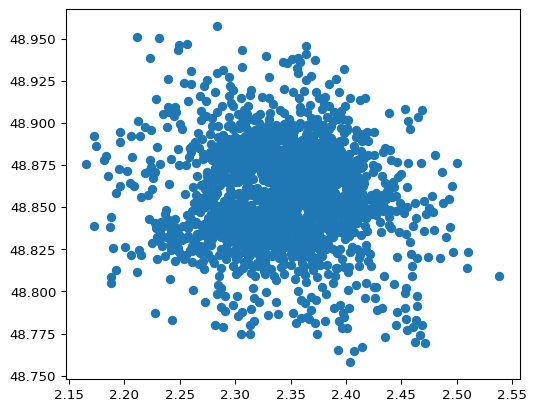

In [ ]:
stations.plot()

Il est même impossible de savoir si on se trouve réellement dans Paris. On peut essayer d’associer nos données aux découpages administratifs pour vérifier que nous sommes bien dans la région parisienne.

La première étape est de récupérer les découpages des arrondissements parisiens et des communes limitrophes, ce qui se fait facilement avec `cartiflette` :

In [ ]:
from cartiflette import carti_download

# 1. Fonds communaux
contours_villes_arrt = carti_download(
    values = ["75", "92", "93", "94"],
    crs = 4326,
    borders="COMMUNE_ARRONDISSEMENT",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

# 2. Départements 
departements = contours_villes_arrt.dissolve("INSEE_DEP")

Si maintenant on utilise ce masque pour contextualiser les données, on est rassuré sur la nature des données.

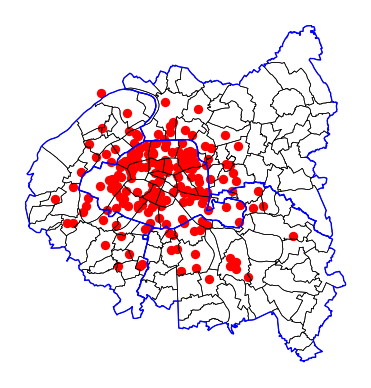

In [ ]:
ax = stations.sample(200).plot(color = "red")
contours_villes_arrt.boundary.plot(ax=ax, edgecolor="k", linewidth=.5)
departements.boundary.plot(ax=ax, edgecolor="blue", linewidth=1)
ax.set_axis_off()

Les Parisiens reconnaîtront facilement leur bourgade car ils connaissent bien l’organisation de l’espace de cette agglomération. Cependant, pour des lecteurs ne connaissant pas celle-ci, cette carte sera de peu de secours. L’idéal est plutôt d’utiliser le fonds de carte contextuel de `Folium` pour cela.

Afin de ne pas surcharger la carte, il est utile d’utiliser la dimension réactive de `Folium` en laissant l’utilisateur.trice naviguer dans la carte et afficher un volume d’information adapté à la fenêtre visible. Pour cela, `Folium` embarque une fonctionnalité `MarkerCluster` très pratique.

On peut ainsi produire la carte désirée de cette manière :

# Références supplémentaires

Chen, Chun-houh, Wolfgang Härdle, Antony Unwin, et Michael Friendly. 2008. « A brief history of data visualization ». *Handbook of data visualization*, 15‑56.